In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
# Read predictions
preds = pd.read_csv("test_pred10_1run.csv", header=None)
preds

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.950357,0.014038,0.035604,0.998353,0.001332,0.000315,0.995202,0.003502,0.001296,0.997181,...,0.000775,0.991426,0.005442,0.003132,9.999917e-01,7.041760e-06,1.259452e-06,9.991075e-01,5.392666e-04,0.000353
1,0.436797,0.456398,0.106805,0.313442,0.674127,0.012431,0.467395,0.498389,0.034217,0.683304,...,0.056647,0.685656,0.195899,0.118445,7.662032e-01,1.702173e-01,6.357946e-02,3.956903e-01,5.212149e-01,0.083095
2,0.455404,0.541937,0.002658,0.746561,0.251239,0.002200,0.918551,0.073277,0.008173,0.972817,...,0.006548,0.917163,0.054356,0.028481,9.994337e-01,5.583414e-04,7.957175e-06,9.969261e-01,2.761868e-03,0.000312
3,0.000574,0.000412,0.999015,0.000006,0.000003,0.999991,0.001980,0.000237,0.997783,0.000230,...,0.999262,0.001680,0.001271,0.997048,4.874777e-09,3.286757e-08,1.000000e+00,1.759722e-07,5.128009e-07,0.999999
4,0.902662,0.062991,0.034347,0.918436,0.062126,0.019438,0.825557,0.122543,0.051900,0.734539,...,0.018718,0.936242,0.039871,0.023887,9.339754e-01,6.490454e-02,1.120071e-03,6.077295e-01,2.811812e-01,0.111089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.968561,0.009325,0.022114,0.995999,0.003030,0.000972,0.942749,0.036554,0.020697,0.989663,...,0.016756,0.757242,0.117346,0.125412,9.219695e-01,9.745320e-03,6.828514e-02,8.624598e-01,5.515090e-02,0.082389
1954,0.309294,0.300769,0.389937,0.489824,0.449712,0.060463,0.790447,0.106398,0.103155,0.937884,...,0.075550,0.839040,0.062572,0.098388,6.581559e-01,1.105440e-01,2.313001e-01,3.731326e-01,1.680953e-01,0.458772
1955,0.995496,0.001560,0.002944,0.987360,0.005745,0.006894,0.704908,0.063361,0.231731,0.885145,...,0.011606,0.682588,0.181359,0.136053,7.003883e-01,2.974278e-01,2.183873e-03,2.425344e-02,9.749914e-01,0.000755
1956,0.078932,0.830609,0.090459,0.366112,0.369484,0.264404,0.395243,0.266765,0.337993,0.679103,...,0.040867,0.690997,0.157888,0.151115,3.936474e-01,5.302275e-01,7.612509e-02,2.948665e-01,5.293496e-01,0.175784


In [3]:
# Read training data
df = pd.read_csv("data/train.csv")

In [4]:
X = df["text"].copy()

authors = df["author"].copy()

# Label data
y = []
for author in authors:
    if author == "EAP":
        y.append([1, 0, 0])
    if author == "HPL":
        y.append([0, 1, 0])
    if author == "MWS":
        y.append([0, 0, 1])

y = np.array(y)

In [5]:
# Extract labels
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    break

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

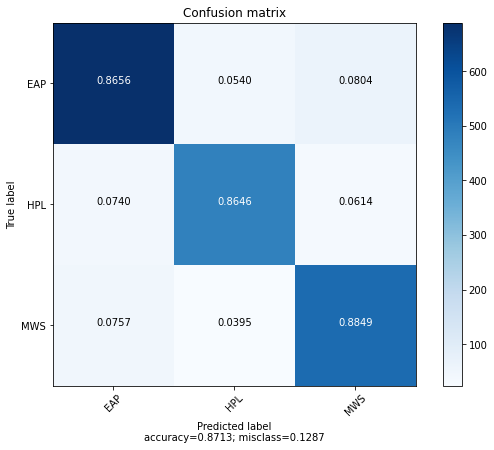

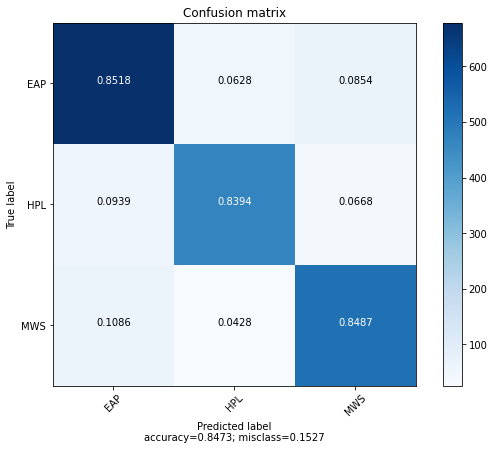

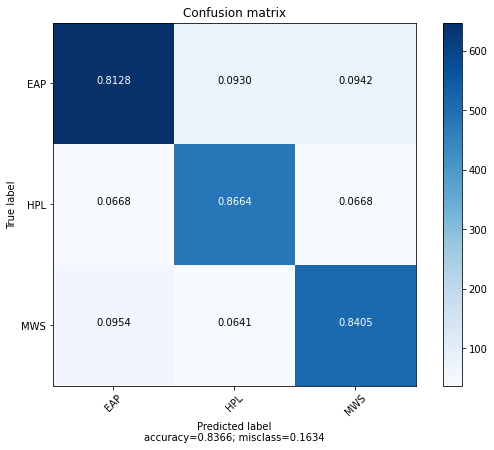

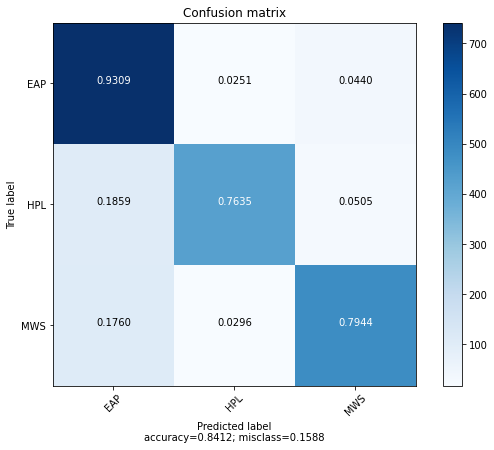

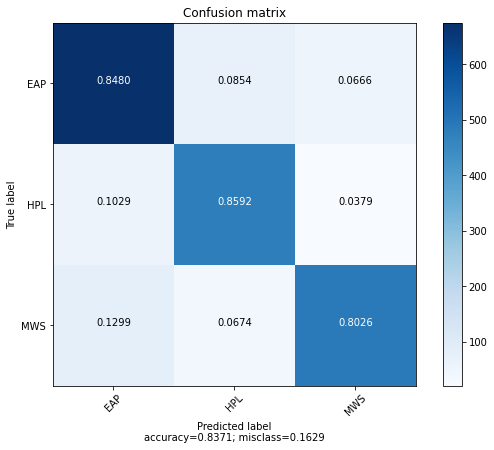

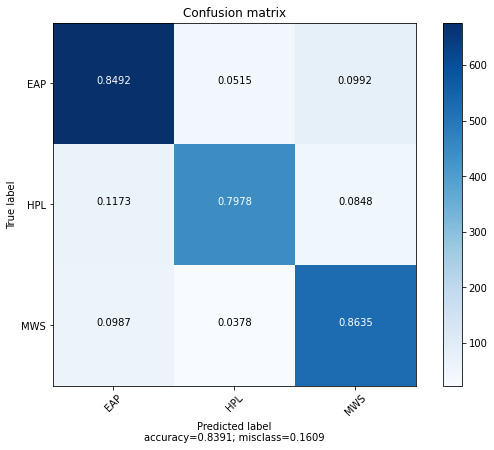

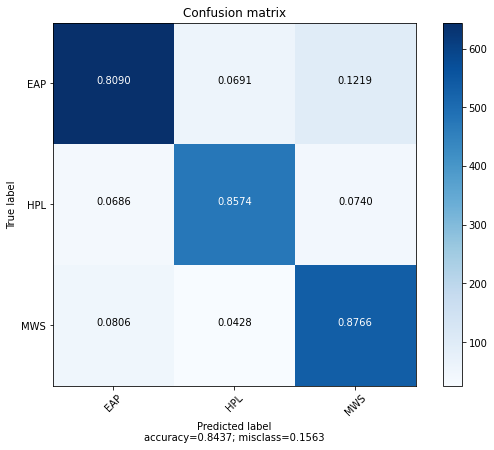

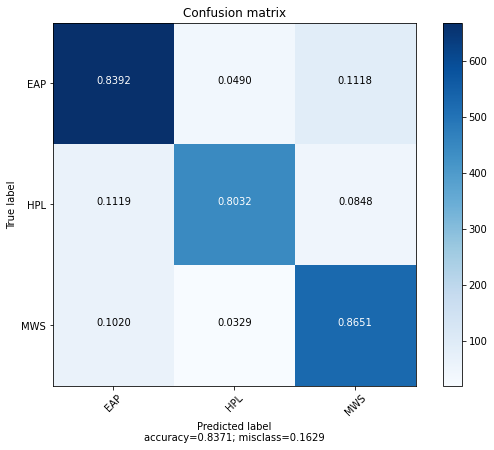

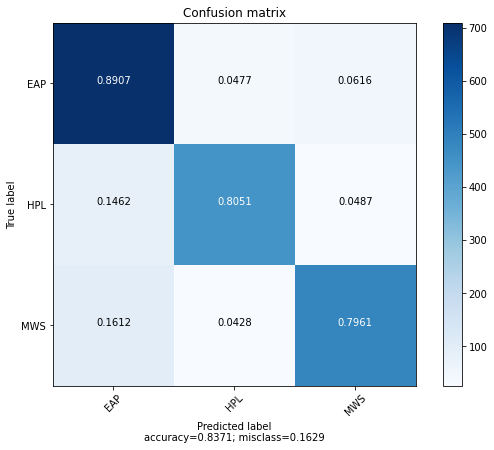

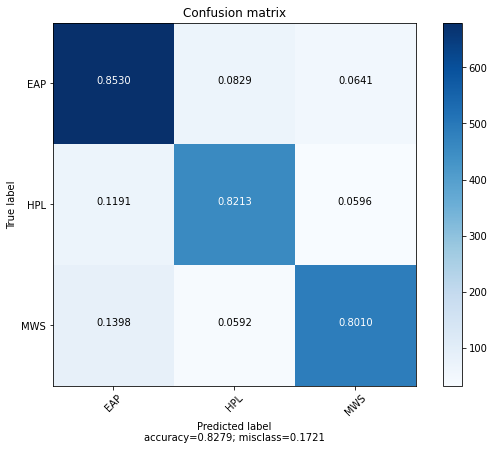

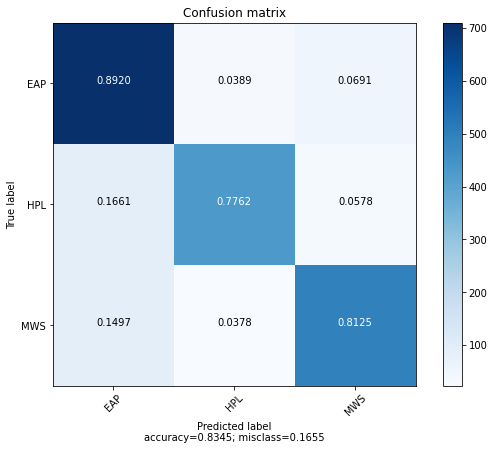

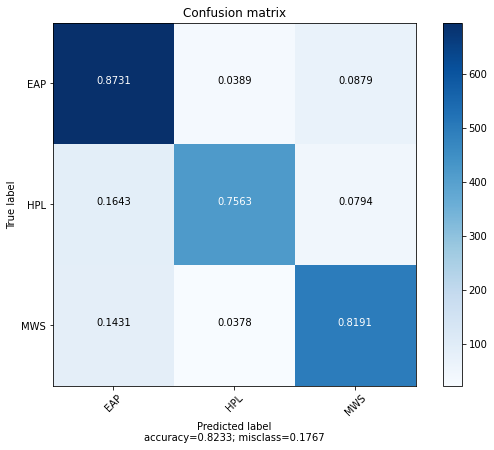

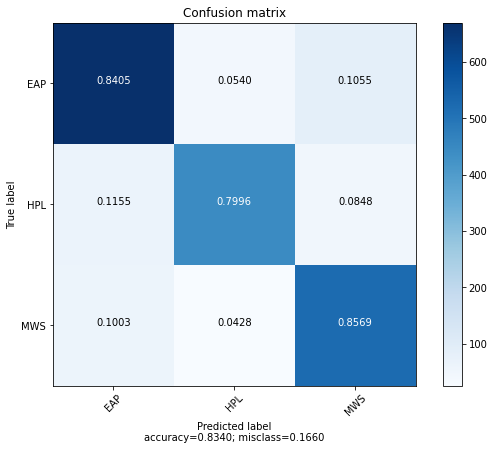

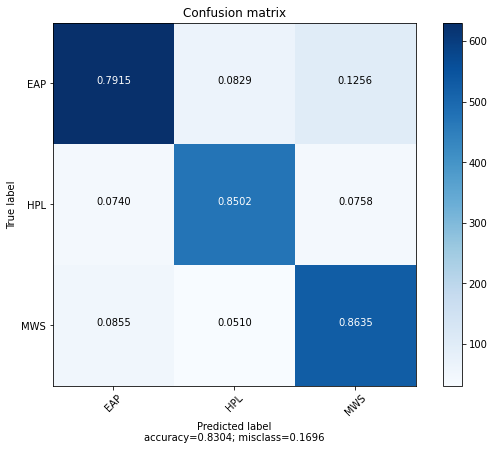

In [8]:
for i in range(0, 42, 3):
    pred = preds.to_numpy()[:, i : i+3]
    pred = np.argmax(pred, axis=1)
    cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
    plot_confusion_matrix(cm, ["EAP", "HPL", "MWS"])